In [1]:
from _Setup import *
# data has been successfully pathed. Time to import in

c:\AI-ML-AlgorithmsII\AI-ML-Algorithms-II\Week2-Assignment1\Data\Fish.csv


# Introduction
##### This assignment involves analyzing data on fish species. Given data on its shape parameters, we will attempt to predict its weight. 

In [2]:
fish_data = pd.read_csv(rawDataFilePath)
fish_data.head(5)


Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

Great, successfully read into a pandas Dataframe.

There are 7 columns: Species, Weight, Length1, Length2, Length3, Height, and Width.

In [3]:
fish_data.columns


Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

Also has 159 observations.

In [4]:
fish_data.shape

(159, 7)

No values are missing!

In [5]:
fish_data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

It's a pretty basic view of the data, so let's visualize the actual data and not solely a table of numbers.

In [6]:
fish_data.describe()

Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000

Since we also have a categorical variable, let's see what we can gleam from this quick overview. There are 7 unique species in this variable, with Perch being the most common type of fish found 56 times within the data. Again, we'll look closer at each species in a bit.

In [7]:
fish_data.describe(include = object)

Species
count      159
unique       7
top      Perch
freq        56

First up, the Species variable. We expand to see the distribution of species within the data and see that in order of frequency, is as follows: Perch, Bream, Roach, Pike, Smelt, Parkki, and Whitefish. Nothing too out of the ordinary but the representation of Whitefish in the data hopefully matches its distribution in the actual population, because it only accounts for 3.77% of all fish in the data.

Text(0.5, 1.0, 'Barplot of the Species Variable')

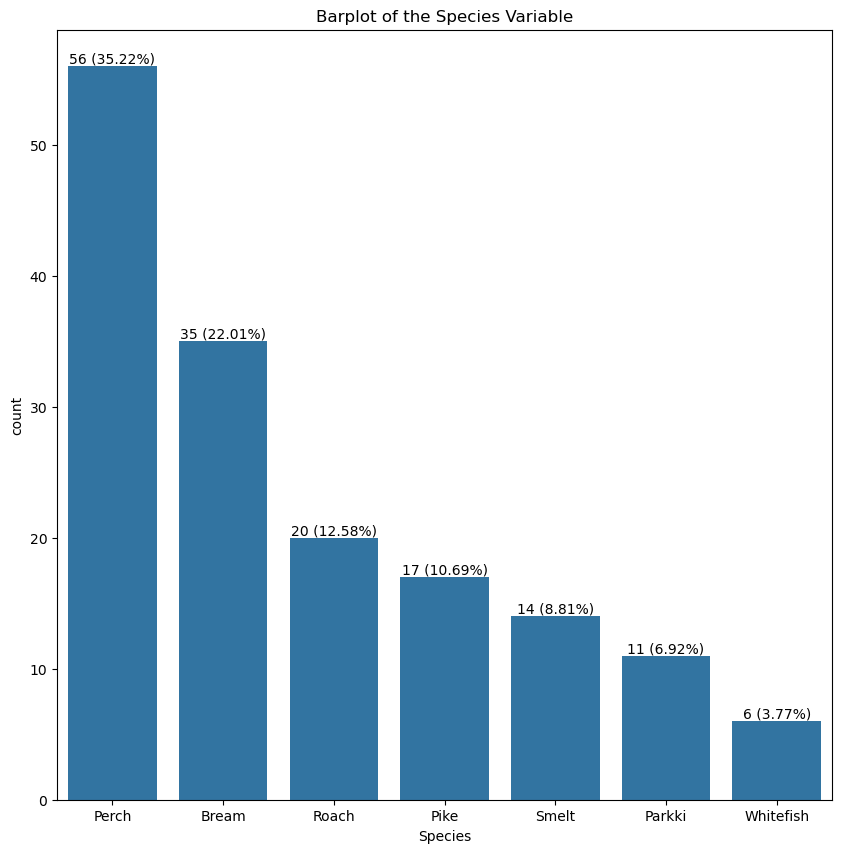

In [8]:
plt.figure(figsize = (10,10))
ax = sns.countplot(x = fish_data['Species'], order = fish_data['Species'].value_counts(ascending = False).index)

v = fish_data['Species'].value_counts(ascending = False)
v1 = fish_data['Species'].value_counts(ascending = False, normalize = True).values *100
lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(v, v1)]

ax.bar_label(container = ax.containers[0], labels = lbls)

ax.set_title('Barplot of the Species Variable')

The histograms for each of the numerical variables don't look too unusual. Weight is right skewed, unimodal and centered around 275. Length1 is somewhat Normal shaped, with a slight right skew and is unimodal centered at around 30. Length2 and Length3 are quite similar with Length1 in appearance. Height is unimodal, centered at around 7, and has a right skew. Finally, Width is somewhat Normal shaped and is centered at around 4.

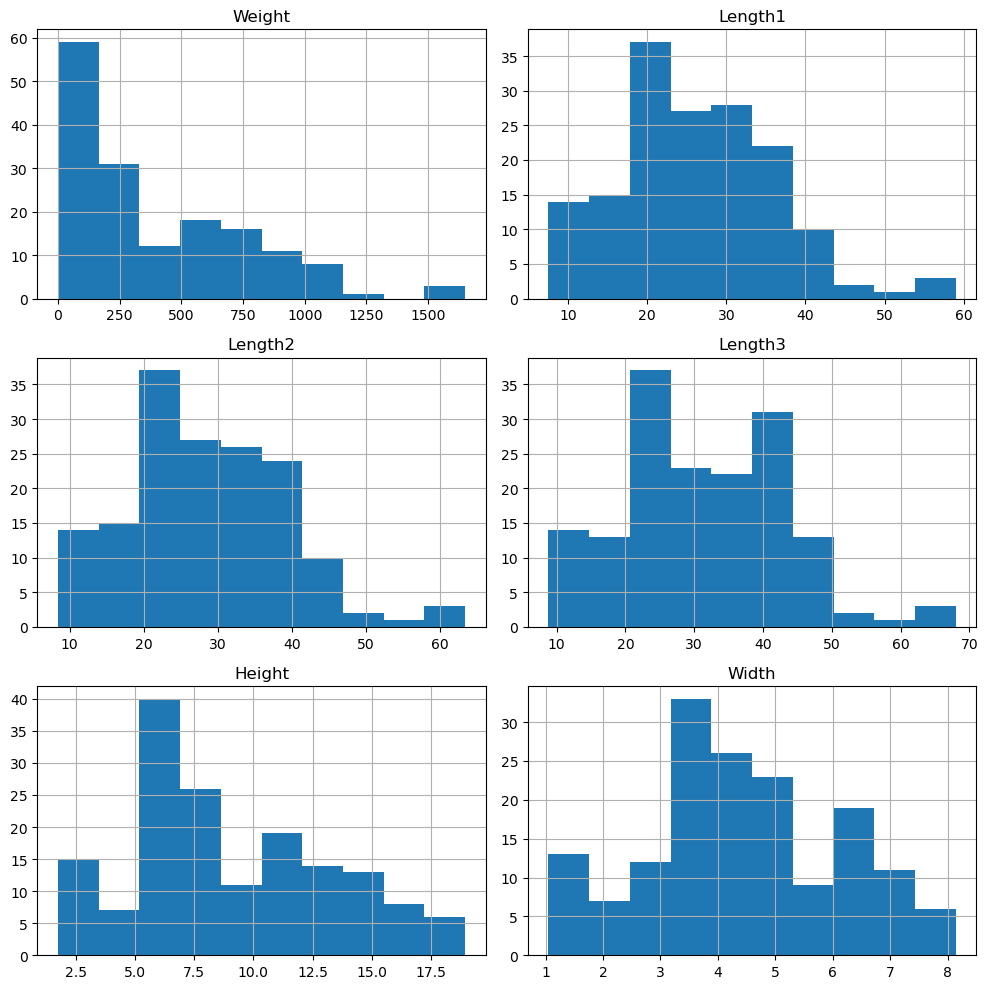

In [9]:
fish_data.hist(bins = 10, figsize = (10,10))
plt.tight_layout()

We can use the sample method from pandas with the parameter of setting the fraction of items to return to 1, or all. This shuffles the Dataframe without changing the original one.

In [10]:
fish_data_shuffled = fish_data.sample(frac = 1)

Let's separate out the X and y variables.

In [11]:
X = fish_data_shuffled.drop(columns = 'Weight')
X.head(5)

Species  Length1  Length2  Length3  Height   Width
152   Smelt     11.3     11.8     13.1  2.2139  1.1659
42    Roach     19.4     21.0     23.7  6.1146  3.2943
74    Perch     13.8     15.0     16.0  3.8240  2.4320
128    Pike     30.0     32.3     34.8  5.5680  3.3756
90    Perch     20.0     22.0     23.5  5.5225  3.9950

In [12]:
y = fish_data_shuffled['Weight']
y.head(5)

152      9.9
42     120.0
74      40.0
128    200.0
90     110.0
Name: Weight, dtype: float64

In [13]:
ratio = 0.8
total_rows = X.shape[0]
train_size = int(total_rows * ratio)

train_X = X[0:train_size]
test_X = X[train_size:]


train_y = y[0:train_size]
test_y = y[train_size:]

print(f"Training set shape for predictor variables: {train_X.shape}")
print(f"Testing set shape for predictor variables: {test_X.shape}")

print(f"Training set shape for response variable: {train_y.shape}")
print(f"Testing set shape for response variable: {test_y.shape}")

Training set shape for predictor variables: (127, 6)
Testing set shape for predictor variables: (32, 6)
Training set shape for response variable: (127,)
Testing set shape for response variable: (32,)


In [14]:
def min_max(column, rescaled_min = 0, rescaled_max = 1):
    min = column.min()
    max = column.max()
    return rescaled_min + (column - min) * (rescaled_max - rescaled_min) / (max - min)


In [15]:
temp = train_X[train_X.columns.difference(['Species'])].apply(min_max, axis = 0)
temp['Species'] = train_X.Species

train_X = temp
train_X.head(5)

Height   Length1   Length2   Length3     Width Species
152  0.028180  0.073786  0.061818  0.072635  0.016675   Smelt
42   0.254588  0.231068  0.229091  0.251689  0.316686   Roach
74   0.121635  0.122330  0.120000  0.121622  0.195140   Perch
128  0.222862  0.436893  0.434545  0.439189  0.328146    Pike
90   0.220221  0.242718  0.247273  0.248311  0.415454   Perch

In [16]:
temp = test_X[test_X.columns.difference(['Species'])].apply(min_max, axis = 0)
temp['Species'] = test_X.Species

test_X = temp
test_X.head(5)

Height   Length1   Length2   Length3     Width    Species
50  0.328315  0.256579  0.255102  0.284615  0.452902      Roach
57  0.415507  0.333333  0.346939  0.361538  0.540347  Whitefish
97  0.263811  0.254386  0.265306  0.259615  0.405237      Perch
3   0.664987  0.348684  0.367347  0.413462  0.504685      Bream
25  0.894141  0.469298  0.489796  0.555769  0.756688      Bream

In [17]:
train_y = min_max(train_y)

train_y.head(5)


152    0.006000
42     0.072727
74     0.024242
128    0.121212
90     0.066667
Name: Weight, dtype: float64

In [18]:
test_y = min_max(test_y)

test_y.head(5)


50    0.119663
57    0.186317
97    0.085078
3     0.222159
25    0.449789
Name: Weight, dtype: float64

Now that both training and testing sets have been split and numerical variables have been rescaled like a min-max scaler with values between 0 and 1, let's move on to initializing the weight vector b, and alpha.

In [19]:
np.random.seed(100)
w = np.random.random(12)

b = np.random.random()
alpha = np.random.random()

print(f"The initial weight vector is {w}, the initial intercept is {round(b, 4)}, and the learning rate is {round(alpha, 4)}")

The initial weight vector is [0.54340494 0.27836939 0.42451759 0.84477613 0.00471886 0.12156912
 0.67074908 0.82585276 0.13670659 0.57509333 0.89132195 0.20920212], the initial intercept is 0.1853, and the learning rate is 0.1084


This changes the categorical variable into several dummy variables.

In [20]:
train_X = pd.get_dummies(train_X, dtype = 'int')

In [21]:
m = train_X.shape[0]
predicted_y = []

n = train_X.shape[1]

time_elapsed = []


for i in range(m):
    start = time.time()
    prediction = (np.transpose(w)*train_X.iloc[i]) + b
    loss_j = []
    for j in range(n):
        loss =  (prediction - train_y.iloc[i])
        loss_j.append(loss*train_X.iloc[i,j])
            
        w = w - (alpha/m)*sum(loss_j)

        b = b - (alpha/m)*sum(loss)
        
    stop = time.time()
    duration = stop-start
    time_elapsed.append(duration)


Height               0.440008
Length1              0.407914
Length2              0.456113
Length3              0.578798
Width                0.275815
Species_Bream        0.411129
Species_Parkki       1.048888
Species_Perch        0.681932
Species_Pike         0.531607
Species_Roach        0.882662
Species_Smelt        1.354491
Species_Whitefish    0.671996
dtype: float64
0.13070864469939042


The estimated coefficients are as follows. The estimated intercept is 0.1307

In [32]:
print(w)
print(b)

Height               0.440008
Length1              0.407914
Length2              0.456113
Length3              0.578798
Width                0.275815
Species_Bream        0.411129
Species_Parkki       1.048888
Species_Perch        0.681932
Species_Pike         0.531607
Species_Roach        0.882662
Species_Smelt        1.354491
Species_Whitefish    0.671996
dtype: float64
0.13070864469939042


It took this code 1.4 seconds to run with 127 iterations.

In [22]:
sum(time_elapsed)


1.372035026550293

Each iteration took around 0.011 seconds to run.

In [23]:
mean(time_elapsed)

0.010803425405907818

 It's time to model Y = wX + b using vectorization. 

In [28]:
# using the same initial values
np.random.seed(100)
w1 = np.random.random(12)

b1 = np.random.random()
alpha1 = np.random.random()


epochs = 500
time_elapsed1 = []

for i in range(epochs):
    start = time.time()
    predictions = np.dot(w1,np.transpose(train_X)) + b1

    w1 = w1 - ((alpha1/m)* np.dot(np.transpose(predictions - train_y), train_X))

    b1 = b1 - (alpha1/m)*sum(np.transpose(predictions - train_y))
    end = time.time()

    duration = end - start
    time_elapsed1.append(duration)




The estimated coefficients came out to be: 

Height=               0.39603276,
Length1=             0.16463873,
Length2=              0.31599003,
Length3=              0.7349956,
Width=                -0.156227,
Species_Bream =       0.24540181,
Species_Parkki=       0.37473915,
Species_Perch=        0.4160278,
Species_Pike =        0.21595593,
Species_Roach=        0.37318954,
Species_Smelt   =     0.5877605,
Species_Whitefish=   0.36541978

and the intercept came out to be -0.666672

In [31]:
print(w1)
print(b1)

[ 0.39603276  0.16463873  0.31599003  0.7349956  -0.15622774  0.24540181
  0.37473915  0.4160278   0.21595593  0.37318954  0.5877605   0.36541978]
-0.6666722325054113


Total time to run this code with 500 epochs was 0.414 seconds

In [29]:
sum(time_elapsed1)

0.41402220726013184

Each iteration took around 0.001 seconds to execute.

In [30]:
mean(time_elapsed1)

0.0008280444145202637

Vectorization definitely helped speed up the run-time between the two models. The one using a nested for-loop ran for 1.4 seconds while the vectorization version ran within 0.4 seconds. 

In addition, they did not entirely converge to the same values, which makes me wonder how accurate the gradient-step implementation of my code was. However, it definitely teaches us about the important that vectorization has in speeding up our computation. 